<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Boosting

_Authors: Kiefer Katovich (SF), Matt Brems (DC)_

---

### Learning Objectives

- Understand the differences between bagging and boosting.
- Understand how boosting is an ensemble method.
- Learn the pros and cons to using boosting models.
- Learn the effect of boosting on the bias-variance trade-off.
- Learn the math and procedure for AdaBoost, the "classic" boosting model.
- Understand the differences between AdaBoost and gradient-boosting models.


### Lesson Guide

- [Boosting as an Ensemble Method](#intro)
- [Pros and Cons of Boosting](#pros-cons)
- [A Visual Description of Bagging vs. Boosting](#viz)
- [Boosting and the Bias-Variance Trade-Off](#bias-variance)
- [AdaBoost](#adaboost)
    - [Training Example: Weights](#ex-weights)
- [AdaBoost Visualization](#adaboost-viz)
- [Gradient Boosting Models](#gradient)
- [Gradient Boosting Visualization](#gboost-viz)
- [The difference Between AdaBoost and Gradient Boosting](#the-difference-between-the-adaboost-and-gradient-boosting)
- [Additional Resources](#resources)

<a id='intro'></a>

## Boosting as an Ensemble Method

---

Boosting is another ensemble method with a different approach to bagging. Boosting takes a weak base learner and tries to make it a strong learner by retraining it on the misclassified samples.

1) **Base model fitting is an iterative procedure**: It cannot be run in parallel.
- **Weights are assigned to observations to indicate their "importance:"** Samples with higher weights are given higher influence on the total error of the next model, prioritizing those observations.
- **Weights change at each iteration with the goal of correcting the errors/misclassifications of the previous iteration**: The first base estimator is fit with uniform weights on the observations.
- **Final prediction is typically constructed by a weighted vote**: Weights for each base model depend on their training errors or misclassification rates.

<a id='pros-cons'></a>
## Pros and Cons of Boosting

---

### Pros

- Achieves higher performance than bagging when the hyperparameters are properly tuned.
- Works equally well for classification and regression.
- Can use "robust" loss functions that make the model resistant to outliers.

---

### Cons

- Difficult and time consuming to properly tune hyperparameters.
- Cannot be parallelized like bagging (bad scalability when there are huge amounts of data).
- Higher risk of overfitting compared to bagging.


<a id='viz'></a>
![boostvsbag](./images/BoostingVSBagging.png) 

<a id='bias-variance'></a>
## Boosting and the Bias-Variance Trade-Off

---

Recall that **bagging aims to reduce variance**.

**Boosting aims to reduce bias** (and can reduce variance a bit as well)!

### Why?

The rationale/theory behind boosting is to combine **many weak learners into a single strong learner.**

Instead of using deep/full decision trees like in bagging, **boosting uses shallow/high-bias base estimators.**

Thus, each weak learner has:

- Low variance.
- High bias.

It uses iterative fitting to explain error/misclassification unexplained by the previous base models and reduces bias without increasing variance.


<a id='adaboost'></a>
## AdaBoost

---

AdaBoost is the original boosting algorithm. Predictions from AdaBoost follow this formula:


### $$ AdaBoost(X) = sign\left(\sum_{t=1}^T\alpha_t h_t(X)\right) $$

Where:

$AdaBoost(X)$ is the classification predictions for $y$ using predictor matrix $X$.

$T$ is the set of "weak learners.”

$\alpha_t$ is the contribution weight for weak learner $t$.

$h_t(X)$ is the prediction of weak learner $t$.

$y$ is binary **with values of negative one and one.*

The core principle of AdaBoost is to **fit a sequence of weak learners** (i.e., models that are only slightly better than random guessing, such as a single-split tree) **on repeatedly modified versions of the data**. After each fit, the importance weights on each observation need to be updated. 

The predictions are then combined through a weighted majority vote (or sum) to produce the final prediction. AdaBoost, like all boosting ensemble methods, focuses the next model's fit on the misclassifications/weaknesses of the prior models.

All training examples start with equal importance weighting. When we finish training a classifier, we update the importance weighting of the classifier itself, represented by alpha $\alpha$:

### $$ \alpha_t = \frac{1}{2}ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{where } \epsilon_t < 1$$

Where $\epsilon_t$ is the misclassification rate for the current classifier:

### $$ \epsilon_t = \frac{\text{misclassifications}_t}{\text{observations}_t} $$

As iterations continue, **examples that are difficult to predict receive ever-increasing influence**. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

<a id='ex-weights'></a>
### Training Example Weights

AdaBoost sets up a weight vector on the observations, denoted as $D_t$ where $t$ is the current model iteration. $D_t$ is a probability distribution that determines how likely it is that a given observation will be selected as part of the training set for the current estimator.

The $\alpha$ weighting of the last-fit estimator is used in the equation for the weighting distribution. The update equation is:

### $$ D_{t+1}(i) = D_t(i) e^{-\alpha_t y_i h_t(x_i)} $$

Where $i$ is the vector of observation indices and $x_i$ is the observation at the index, $y_i$ is the target.

$h_t$ is the previous model fit in the boosting chain.

Lastly, we'll divide the weights by the sum of weights to normalize them, ensuring that they sum to one and form a probability distribution:

### $$ D_{t+1}(i) = \frac{D_{t+1}(i)}{\sum_{i=1}^N D_{t+1}(i)}$$

<a id='adaboost-viz'></a>
## AdaBoost Visualization

![boostvsbag](./images/adaboost-viz.png)

<a id='gradient'></a>
## Gradient Boosting Models

---

Gradient boosting classifiers are a generalization of boosting to arbitrary, differentiable loss functions. The intuition behind this mechanism is to:

1. Fit a model $F$ to the data.
2. Look at the difference between our observed $y$ and our model $F$. (The $y_i - F(x_i)$ can be thought of as residuals!)
3. Fit a second model, $F_2$, to (roughly) the residuals $y_i - F(x_i)$.
4. Aggregate your model $F$ and $F_2$. While we won't get into the details now, we can interpret residuals as negative gradients. By doing this, we can apply our gradient descent algorithm to optimize our loss and generalize this to many loss functions.

GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient tree boosting models are used in a variety of areas, including web search ranking and ecology.

[This presentation](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) shows a visual example of AdaBoost at work and how AdaBoost laid the groundwork for gradient boosting classifiers.

**The advantages of GBRT are:**

- Natural handling of mixed data types (= heterogeneous features).
- Predictive power.
- Robustness to outliers in output space (via robust loss functions).

**The disadvantages of GBRT are:**
- Scalability: Due to the sequential nature of boosting, it can hardly be parallelized.
- Difficult hyperparameters to tune.


> _For more detailed explanations, see [here](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting) and [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/)._


<a id='gboost-viz'></a>
## Gradient Boosting Visualization
![boostvsbag](./images/gboost-viz.png)

<a id='the-difference-between-the-adaboost-and-gradient-boosting'></a>
## The Difference Between the AdaBoost and Gradient Boosting

---


- AdaBoost is about reweighting the preceding model's errors in subsequent iterations.
- Gradient boosting is about fitting subsequent models to the residuals of the last model.

## Playground

---

Let's practice boosting in `sklearn`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
moons = make_moons (n_samples=300, noise=0.5, random_state=42)
X, y = moons
X = StandardScaler().fit_transform(X)

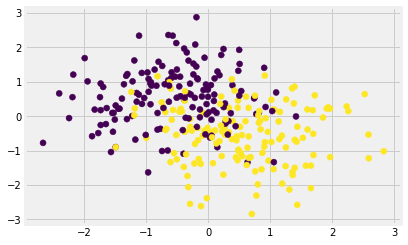

In [4]:
plt.scatter(X [:,0], X[:,1], c=y)

In [11]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(n_estimators=6, random_state=42)
ada.fit(X_train, y_train)
ada.score (X_test, y_test)

0.82222222222222219

In [12]:
#do the same, but loopoing to get the best N_estimator

scores_test = []
scores_train = []
n_estimators = []

for n_est in range(1,30):
    ada = AdaBoostClassifier(n_estimators=n_est, random_state=42)
    ada.fit(X_train, y_train)
    
    n_estimators.append(n_est)
    scores_test.append(ada.score(X_test, y_test))
    scores_train.append(ada.score(X_train, y_train))
    

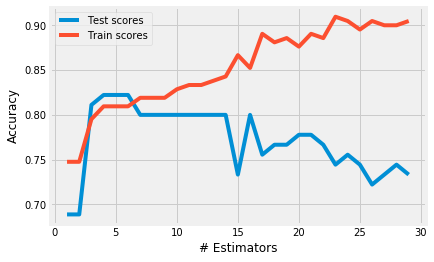

In [14]:
#plotting

plt.plot(n_estimators, scores_test, label='Test scores')
plt.plot(n_estimators, scores_train, label='Train scores')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.legend();

In [15]:
list(zip(n_estimators, scores_test, scores_train))

[(1, 0.68888888888888888, 0.74761904761904763),
 (2, 0.68888888888888888, 0.74761904761904763),
 (3, 0.81111111111111112, 0.79523809523809519),
 (4, 0.82222222222222219, 0.80952380952380953),
 (5, 0.82222222222222219, 0.80952380952380953),
 (6, 0.82222222222222219, 0.80952380952380953),
 (7, 0.80000000000000004, 0.81904761904761902),
 (8, 0.80000000000000004, 0.81904761904761902),
 (9, 0.80000000000000004, 0.81904761904761902),
 (10, 0.80000000000000004, 0.82857142857142863),
 (11, 0.80000000000000004, 0.83333333333333337),
 (12, 0.80000000000000004, 0.83333333333333337),
 (13, 0.80000000000000004, 0.83809523809523812),
 (14, 0.80000000000000004, 0.84285714285714286),
 (15, 0.73333333333333328, 0.8666666666666667),
 (16, 0.80000000000000004, 0.85238095238095235),
 (17, 0.75555555555555554, 0.89047619047619042),
 (18, 0.76666666666666672, 0.88095238095238093),
 (19, 0.76666666666666672, 0.88571428571428568),
 (20, 0.77777777777777779, 0.87619047619047619),
 (21, 0.77777777777777779, 0.8

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)

scores_test = []
scores_train = []
n_estimators = []

for n_est in range(1,30):
    gbc = GradientBoostingClassifier(n_estimators=n_est, random_state=42)
    gbc.fit(X_train, y_train)
    
    n_estimators.append(n_est)
    scores_test.append(gbc.score(X_test, y_test))
    scores_train.append(gbc.score(X_train, y_train))

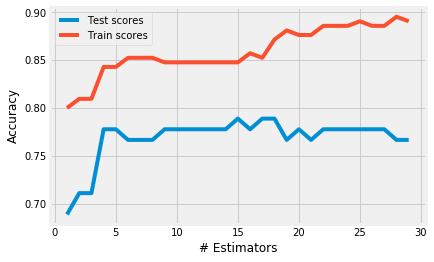

In [17]:
plt.plot(n_estimators, scores_test, label='Test scores')
plt.plot(n_estimators, scores_train, label='Train scores')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.legend();

## What's next?

---

There is no lab today!  You can choose your own adventure instead.  Below are some options for how you may want to spend your time.

- Practice boosting on a diabetes data set in the `IndependentPractice.ipynb` notebook. (No solutions provided.)
- Take a deep-dive into how AdaBoost works by implementing it from scratch in the `adaboost-from-scratch.ipynb` notebook. (Solutions provided)
- `XGBoost` is a popular boosting package, seperate from `sklearn`.  (Many Kaggle competitions have been won with XGBoost.)  Try installing it and using it on a sample dataset (maybe the diabetes data included with this repo.) [http://xgboost.readthedocs.io/en/latest/](http://xgboost.readthedocs.io/en/latest/)
- Work on project 3
- Catch up on labs.

<a id='resources'></a>

## Additional Resources

---

- [Random Forest on Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Quora Question on Random Forests](https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859)
- [Scikit-Learn Ensemble Methods](http://scikit-learn.org/stable/modules/ensemble.html)
- [Scikit-Learn Random Forest Classifiers](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Academic Introduction to Adaptive Boosting](http://rob.schapire.net/papers/explaining-adaboost.pdf)
- [Stack Exchange AdaBoost vs. Gradient Boosting](http://stats.stackexchange.com/questions/164233/intuitive-explanations-of-differences-between-gradient-boosting-trees-gbm-ad)
- [A Gentle Introduction to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)
- [Quora on Intuitive Explanations of AdaBoost](https://www.quora.com/What-is-AdaBoost)
- MIT on [Adaptive Boosting](http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)
- A Lighter [Math Introduction](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) to AdaBoosting and Gradient Boosting (h/t Charlie)
- A [Walk Through](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) on Tuning Gradient Boosting Models (h/t Sheena)
